Zmienne:

- babies per woman (total fertility rate) - The number of children that would be born to each woman with prevailing age-specific fertility rates
- CO2 emissions per person - carbon dioxide emissions from the burning of fossil fuels (metric tonnes of CO2 per person)
- child mortality - Death of childer under five years of age per 1000 live births
- income - Gross domestic product per person adjusted for differences in purchasing power
- life expectancy (life span) - the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same thoroughout its life.
- population - number of inhabitants
- HIV - total number of persons in all ages that are estimated to be infected by HIV, oncluding those without symptoms, those sick from AIDS and those healthy due to treatment of the HIV infection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin

In [2]:
# kraje europejskie - https://pl.wikipedia.org/wiki/Państwa_Europy
# brakuje: Andora, Liechtenstein, Monako, San Marino, Watykan
# celowo nieuwzględnione: Turkey, Kazakhstan

Europe = ['Albania', 'Austria', 'Belgium', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
          'Montenegro', 'Czech Republic', 'Denmark', 'Estonia',
          'Finland', 'France', 'Greece', 'Spain', 'Netherlands',
          'Ireland', 'Iceland', 'Lithuania',
          'Luxembourg', 'Latvia', 'North Macedonia', 'Malta',
          'Moldova', 'Germany', 'Norway', 'Poland', 'Portugal',
          'Russia', 'Romania', 'Serbia', 'Slovak Republic',
          'Slovenia', 'Switzerland', 'Sweden', 'Ukraine',
          'Hungary', 'United Kingdom', 'Italy']

Wybrane kraje europejskie:

['Albania', 'Austria', 'Belgium', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Montenegro', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Spain', 'Netherlands', 'Ireland', 'Iceland', 'Lithuania', 'Luxembourg', 'Latvia', 'Macedonia, FYR', 'Malta', 'Moldova', 'Germany', 'Norway', 'Poland', 'Portugal', 'Russia', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Switzerland', 'Sweden', 'Ukraine', 'Hungary', 'United Kingdom', 'Italy']

\newpage

# EDA

## Babies per woman

okres: 1800 - 2100

In [3]:
df1 = pd.read_csv("../../data/gapminder/children_per_woman_total_fertility.csv")

df1 = df1.melt(id_vars="country", var_name="year", value_name="fertility")

df1 = df1[df1['country'].isin(Europe)].reset_index(drop=True)
df1

,country,year,fertility
0,Albania,1800,4.60
1,Austria,1800,5.10
2,Belgium,1800,4.85
3,Bulgaria,1800,5.16
4,Bosnia and Herzegovina,1800,5.91
...,...,...,...
11734,Serbia,2100,1.80
11735,Slovak Republic,2100,1.79
11736,Slovenia,2100,1.85
11737,Sweden,2100,1.93


In [4]:
df1.dropna().shape

(11739, 3)

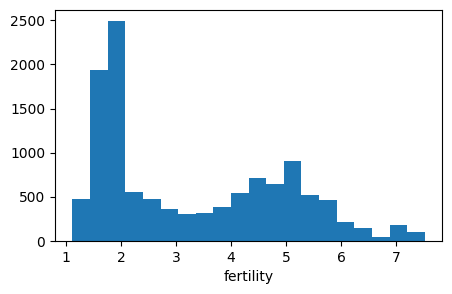

In [5]:
plt.figure(figsize=(5, 3))

plt.hist(df1["fertility"], bins=20)

plt.xlabel("fertility")
plt.show()

\newpage

## CO2 emissions per person

okres: 1960 - 2018

In [6]:
df2 = pd.read_csv("../../data/gapminder/co2_emissions_tonnes_per_person.csv")

df2 = df2.melt(id_vars="country", var_name="year", value_name="co2_emission")

df2["year"] = df2["year"].astype(int)
df2 = df2[(df2["country"].isin(Europe)) & (df2["year"] >= 1961)].reset_index(drop=True)
df2

,country,year,co2_emission
0,Albania,1961,1.35
1,Austria,1961,4.48
2,Belgium,1961,10.1
3,Bulgaria,1961,3.26
4,Bosnia and Herzegovina,1961,1.67
...,...,...,...
2257,Serbia,2018,5.17
2258,Slovak Republic,2018,6.61
2259,Slovenia,2018,6.95
2260,Sweden,2018,4.12


In [7]:
(2018 - 1961 + 1) * len(Europe)

2262

In [8]:
df2.dropna().shape

(2262, 3)

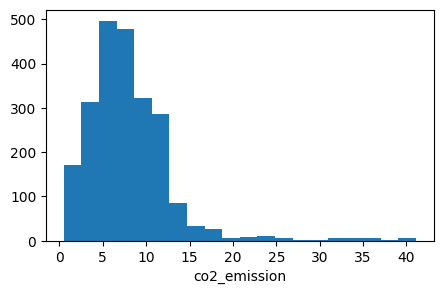

In [9]:
plt.figure(figsize=(5, 3))

plt.hist(df2["co2_emission"], bins=20)

plt.xlabel("co2_emission")
plt.show()

\newpage

## Child mortality

okres: 1800 - 2100

In [10]:
df3 = pd.read_csv("../../data/gapminder/child_mortality_0_5_year_olds_dying_per_1000_born.csv")

df3 = df3.melt(id_vars="country", var_name="year", value_name="child_mortality")

df3["year"] = df3["year"].astype(int)
df3 = df3[(df3["country"].isin(Europe))].reset_index(drop=True)
df3

,country,year,child_mortality
0,Albania,1800,375.00
1,Austria,1800,387.00
2,Belgium,1800,322.00
3,Bulgaria,1800,370.00
4,Bosnia and Herzegovina,1800,379.00
...,...,...,...
11734,Serbia,2100,1.04
11735,Slovak Republic,2100,1.56
11736,Slovenia,2100,0.39
11737,Sweden,2100,0.40


In [11]:
(2100 - 1800 + 1) * len(Europe)

11739

In [12]:
df3.dropna().shape

(11739, 3)

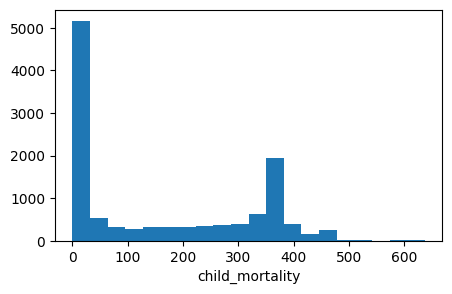

In [13]:
plt.figure(figsize=(5, 3))

plt.hist(df3["child_mortality"], bins=20)

plt.xlabel("child_mortality")
plt.show()

\newpage

## Income

okres: 1800 - 2100

In [14]:
df4 = pd.read_csv("../../data/gapminder/gdp_pcap.csv")

df4 = df4.melt(id_vars="country", var_name="year", value_name="income")

df4["year"] = df4["year"].astype(int)

cond = df4["income"].str[-1] == "k"
df4.loc[cond, "income"] = df4.loc[cond, "income"].str[:-1]
df4["income"] = df4["income"].astype("float64")
df4.loc[cond, "income"] = df4.loc[cond, "income"] * 1000

df4 = df4[(df4["country"].isin(Europe))].reset_index(drop=True)
df4

,country,year,income
0,Albania,1800,569.0
1,Austria,1800,2360.0
2,Belgium,1800,3220.0
3,Bulgaria,1800,1380.0
4,Bosnia and Herzegovina,1800,1200.0
...,...,...,...
11734,Serbia,2100,37800.0
11735,Slovak Republic,2100,68900.0
11736,Slovenia,2100,77800.0
11737,Sweden,2100,76500.0


In [15]:
(2100 - 1800 + 1) * len(Europe)

11739

In [16]:
df4.dropna().shape

(11739, 3)

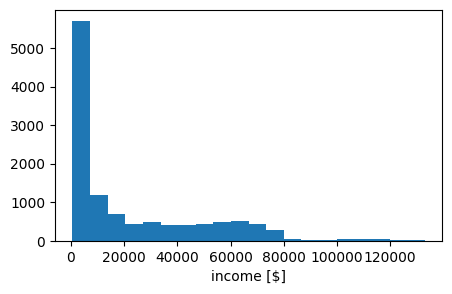

In [17]:
plt.figure(figsize=(5, 3))

plt.hist(df4["income"], bins=20)

plt.xlabel("income [$]")
plt.show()

\newpage

## Life expectancy 

okres: 1800 - 2100

In [18]:
df5 = pd.read_csv("../../data/gapminder/lex.csv")

df5 = df5.melt(id_vars="country", var_name="year", value_name="lifespan")

df5["year"] = df5["year"].astype(int)

df5 = df5[(df5["country"].isin(Europe))].reset_index(drop=True)
df5

,country,year,lifespan
0,Albania,1800,35.4
1,Austria,1800,34.4
2,Belgium,1800,40.0
3,Bulgaria,1800,35.8
4,Bosnia and Herzegovina,1800,35.1
...,...,...,...
11734,Serbia,2100,86.0
11735,Slovak Republic,2100,87.6
11736,Slovenia,2100,91.2
11737,Sweden,2100,92.1


In [19]:
(2100 - 1800 + 1) * len(Europe)

11739

In [20]:
df5.dropna().shape

(11739, 3)

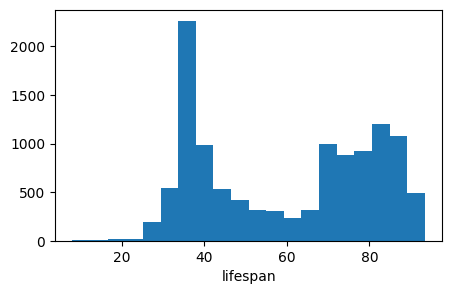

In [21]:
plt.figure(figsize=(5, 3))

plt.hist(df5["lifespan"], bins=20)

plt.xlabel("lifespan")
plt.show()

\newpage

## Population

okres: 1800 - 2100

In [22]:
df6 = pd.read_csv("../../data/gapminder/pop.csv")

df6 = df6.melt(id_vars="country", var_name="year", value_name="population")

df6["year"] = df6["year"].astype(int)

cond1 = df6["population"].str[-1] == "k"
df6.loc[cond1, "population"] = df6.loc[cond1, "population"].str[:-1]
cond2 = df6["population"].str[-1] == "M"
df6.loc[cond2, "population"] = df6.loc[cond2, "population"].str[:-1]
cond3 = df6["population"].str[-1] == "B"
df6.loc[cond3, "population"] = df6.loc[cond3, "population"].str[:-1]

df6["population"] = df6["population"].astype("float64")
df6.loc[cond1, "population"] = df6.loc[cond1, "population"] * 10**3
df6.loc[cond2, "population"] = df6.loc[cond2, "population"] * 10**6
df6.loc[cond3, "population"] = df6.loc[cond3, "population"] * 10**9

df6 = df6[(df6["country"].isin(Europe))].reset_index(drop=True)
df6

,country,year,population
0,Albania,1800,400000.0
1,Austria,1800,3000000.0
2,Belgium,1800,3250000.0
3,Bulgaria,1800,2250000.0
4,Bosnia and Herzegovina,1800,852000.0
...,...,...,...
11734,Serbia,2100,3270000.0
11735,Slovak Republic,2100,3850000.0
11736,Slovenia,2100,1670000.0
11737,Sweden,2100,13200000.0


In [23]:
(2100 - 1800 + 1) * len(Europe)

11739

In [24]:
df6.dropna().shape

(11739, 3)

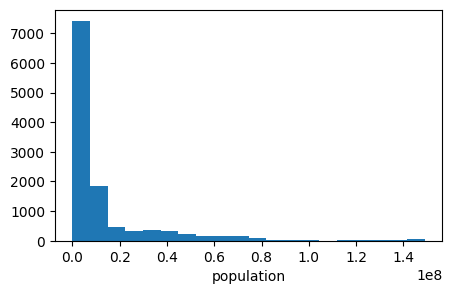

In [25]:
plt.figure(figsize=(5, 3))

plt.hist(df6["population"], bins=20)

plt.xlabel("population")
plt.show()

\newpage

## HIV

- okres: 1990 - 2011
- 34 kraje

In [26]:
df7 = pd.read_csv("../../data/gapminder/people_living_with_hiv_number_all_ages.csv")

df7 = df7.melt(id_vars="country", var_name="year", value_name="hiv")

df7["year"] = df7["year"].astype(int)

cond1 = df7["hiv"].str[-1] == "k"
df7.loc[cond1, "hiv"] = df7.loc[cond1, "hiv"].str[:-1]
cond2 = df7["hiv"].str[-1] == "M"
df7.loc[cond2, "hiv"] = df7.loc[cond2, "hiv"].str[:-1]

df7["hiv"] = df7["hiv"].astype("float64")
df7.loc[cond1, "hiv"] = df7.loc[cond1, "hiv"] * 10**3
df7.loc[cond2, "hiv"] = df7.loc[cond2, "hiv"] * 10**6

df7 = df7[(df7["country"].isin(Europe)) & (df7["year"] >= 1990)].reset_index(drop=True)
df7

,country,year,hiv
0,Austria,1990,600.0
1,Belgium,1990,1400.0
2,Bulgaria,1990,350.0
3,Belarus,1990,60.0
4,Switzerland,1990,7900.0
...,...,...,...
743,Serbia,2011,3500.0
744,Slovak Republic,2011,350.0
745,Slovenia,2011,600.0
746,Sweden,2011,9100.0


In [27]:
(2011 - 1990 + 1) * len(Europe)

858

In [28]:
df7.dropna().shape

(748, 3)

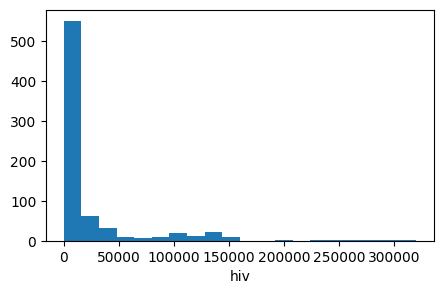

In [29]:
plt.figure(figsize=(5, 3))

plt.hist(df7["hiv"], bins=20)

plt.xlabel("hiv")
plt.show()

\newpage

# Outliers detection

## 1d

### Babies per woman

- okres 65 lat: 1950 - 2014

In [30]:
tmp1 = pd.read_csv("../../data/gapminder/children_per_woman_total_fertility.csv")

tmp1 = tmp1.melt(id_vars="country", var_name="year", value_name="fertility")

tmp1["year"] = tmp1["year"].astype(int)

tmp1 = tmp1[(tmp1["country"].isin(Europe)) & (tmp1["year"] >= 1950) & (tmp1["year"] <= 2014)].reset_index(drop=True)


x_train = tmp1[["fertility"]].dropna().to_numpy()
print(f"Licznosc zbioru: {x_train.size}")

Licznosc zbioru: 2535


Najlepszy mnożnik h: 5.000, r: 0.01, Wskaźnik: 0.220


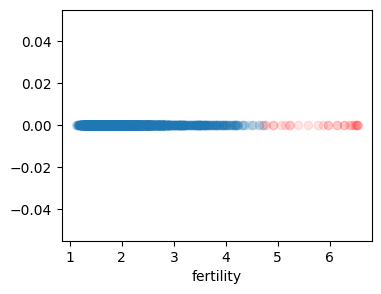

In [31]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 0] * 0, alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0] * 0, alpha=0.1, c="red")
plt.xlabel("fertility")
plt.show()

\newpage

### Income

- okres 100 lat: 1919 - 2019

In [32]:
tmp2 = pd.read_csv("../../data/gapminder/gdp_pcap.csv")

tmp2 = tmp2.melt(id_vars="country", var_name="year", value_name="income")

tmp2["year"] = tmp2["year"].astype(int)

cond = tmp2["income"].str[-1] == "k"
tmp2.loc[cond, "income"] = tmp2.loc[cond, "income"].str[:-1]
tmp2["income"] = tmp2["income"].astype("float64")
tmp2.loc[cond, "income"] = tmp2.loc[cond, "income"] * 1000

tmp2 = tmp2[(tmp2["country"].isin(Europe)) & (tmp2["year"] >= 1919) & (tmp2["year"] <= 2019)].reset_index(drop=True)


x_train = tmp2[["income"]].dropna().to_numpy()
print(f"Licznosc zbioru: {x_train.size}")

Licznosc zbioru: 3939


Najlepszy mnożnik h: 5.000, r: 0.01, Wskaźnik: 0.242


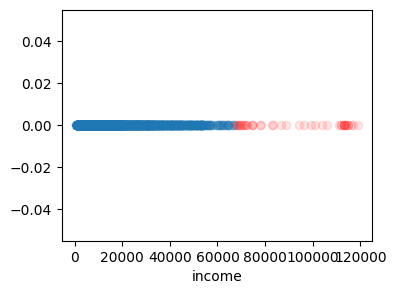

In [33]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 0] * 0, alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0] * 0, alpha=0.1, c="red")
plt.xlabel("income")
plt.show()

\newpage

### Population

- okres 100 lat: 1919 - 2019

In [34]:
tmp3 = pd.read_csv("../../data/gapminder/pop.csv")

tmp3 = tmp3.melt(id_vars="country", var_name="year", value_name="population")

tmp3["year"] = tmp3["year"].astype(int)

cond1 = tmp3["population"].str[-1] == "k"
tmp3.loc[cond1, "population"] = tmp3.loc[cond1, "population"].str[:-1]
cond2 = tmp3["population"].str[-1] == "M"
tmp3.loc[cond2, "population"] = tmp3.loc[cond2, "population"].str[:-1]
cond3 = tmp3["population"].str[-1] == "B"
tmp3.loc[cond3, "population"] = tmp3.loc[cond3, "population"].str[:-1]

tmp3["population"] = tmp3["population"].astype("float64")
tmp3.loc[cond1, "population"] = tmp3.loc[cond1, "population"] * 10**3
tmp3.loc[cond2, "population"] = tmp3.loc[cond2, "population"] * 10**6
tmp3.loc[cond3, "population"] = tmp3.loc[cond3, "population"] * 10**9

tmp3 = tmp3[(tmp3["country"].isin(Europe)) & (tmp3["year"] >= 1919) & (tmp3["year"] <= 2019)].reset_index(drop=True)


x_train = tmp3[["population"]].dropna().to_numpy()
print(f"Licznosc zbioru: {x_train.size}")

Licznosc zbioru: 3939


Najlepszy mnożnik h: 1.800, r: 0.24, Wskaźnik: 0.309


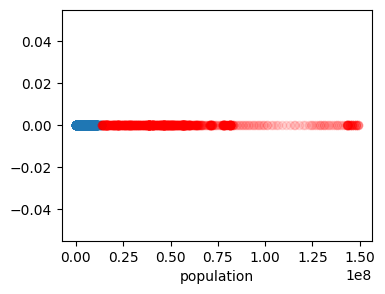

In [35]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 0] * 0, alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0] * 0, alpha=0.1, c="red")
plt.xlabel("population")
plt.show()

\newpage

### HIV / Population

- liczba ludzi z hiv w danym kraju podzielona przez licznosc populacji danego kraju
- okres 22 lat: 1990 - 2011
- 34 kraje

In [36]:
tmp4 = pd.read_csv("../../data/gapminder/people_living_with_hiv_number_all_ages.csv")

tmp4 = tmp4.melt(id_vars="country", var_name="year", value_name="hiv")

tmp4["year"] = tmp4["year"].astype(int)

cond1 = tmp4["hiv"].str[-1] == "k"
tmp4.loc[cond1, "hiv"] = tmp4.loc[cond1, "hiv"].str[:-1]
cond2 = tmp4["hiv"].str[-1] == "M"
tmp4.loc[cond2, "hiv"] = tmp4.loc[cond2, "hiv"].str[:-1]

tmp4["hiv"] = tmp4["hiv"].astype("float64")
tmp4.loc[cond1, "hiv"] = tmp4.loc[cond1, "hiv"] * 10**3
tmp4.loc[cond2, "hiv"] = tmp4.loc[cond2, "hiv"] * 10**6

tmp4 = tmp4[(tmp4["country"].isin(Europe)) & (tmp4["year"] >= 1990)].reset_index(drop=True)


tmp43 = tmp4.merge(tmp3, "inner", ["country", "year"])


x_train = (tmp43["hiv"] / tmp43["population"]).to_numpy()[:, None]
print(f"Licznosc zbioru: {x_train.size}")

Licznosc zbioru: 748


Najlepszy mnożnik h: 2.000, r: 0.03, Wskaźnik: 0.534


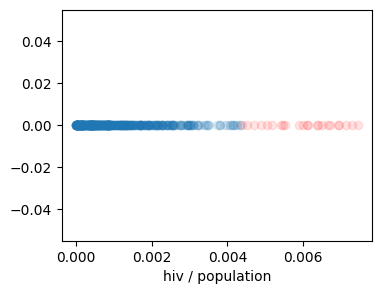

In [37]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 0] * 0, alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0] * 0, alpha=0.1, c="red")
plt.xlabel("hiv / population")
plt.show()

\newpage

## 2d

### Babies per woman, income

In [38]:
tmp12 = tmp1.merge(tmp2, "inner", ["country", "year"])

x_train = tmp12[["fertility", "income"]].dropna().to_numpy()
print(f"Licznosc zbioru: {x_train.shape[0]}")

Licznosc zbioru: 2535


Najlepszy mnożnik h: 5.000, r: 0.02, Wskaźnik: 0.366


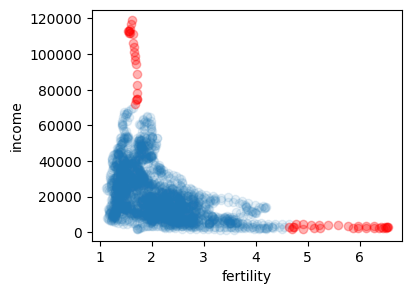

In [39]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 1], alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1], alpha=0.3, c="red")
plt.xlabel("fertility")
plt.ylabel("income")
plt.show()

\newpage

### Income, HIV / Population

In [40]:
tmp243 = tmp2.merge(tmp43, "inner", ["country", "year"])
tmp243["hiv/pop"] = tmp243["hiv"] / tmp243["population"]

x_train = tmp243[["income", "hiv/pop"]].dropna().to_numpy()
print(f"Licznosc zbioru: {x_train.shape[0]}")

Licznosc zbioru: 748


Najlepszy mnożnik h: 1.600, r: 0.01, Wskaźnik: 0.670


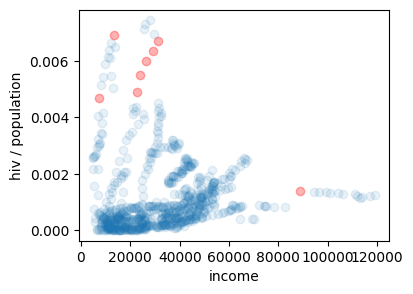

In [41]:
bandwidth = direct_plugin(x_train, stage=2)

metrics_list = []
h_mul_list = []
r_list = []
for h_mul in np.arange(0.2, 5.2, 0.2):
# for h_mul in np.array([0.9, 1.0, 1.1]):
    h_mul = round(h_mul, 3)

    for r in np.arange(0.01, 0.51, 0.01):
#     for r in np.array([0.01, 0.05, 0.1]):
        r = round(r, 3)

        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        scores_out = np.sort(scores[outliers])[-tmp:]
        scores_in = np.sort(scores[inliers])[:tmp]
        metrics = np.sum(scores_out) / np.sum(scores_in)

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)
        r_list.append(r)

# Find minima
idx = np.argmin(metrics_list)
print(f"Najlepszy mnożnik h: {h_mul_list[idx]:.3f}, r: {r_list[idx]}, Wskaźnik: {metrics_list[idx]:.3f}")

#######
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*h_mul_list[idx], r=r_list[idx])
labels_pred = outliers_detector.predict(x_train)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[labels_pred==0, 0], x_train[labels_pred==0, 1], alpha=0.1)
plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1], alpha=0.3, c="red")
plt.xlabel("income")
plt.ylabel("hiv / population")
plt.show()